# Processing

In [464]:
import datetime
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns

from preprocessing import *

from pathlib import Path

import scipy.cluster.hierarchy as sch

In [465]:
dataset_filepath = "../../../data/upftfg26/apujols/processed/dataset_new.csv"

In [466]:
dataset = pd.read_csv(dataset_filepath, sep=";")
dataset.head(5)

,filename,year,month,day,hour,minute,lng,lat,alt,camera,width,height,frames,fps,time,mean_brightness,class,date_str,datetime
0,M20251004_190700_MasLaRoca_NE,2025,10,4,19,7,2.19,41.56,570.0,NE,150.0,247.0,62.0,25.0,0.04,70.666667,unknown,M20251004,2025-10-04 19:07:00
1,M20251004_225201_MasLaRoca_NE,2025,10,4,22,52,2.19,41.56,570.0,NE,418.0,132.0,120.0,25.0,2.40,53.413793,unknown,M20251004,2025-10-04 22:52:00
2,M20251005_053814_MasLaRoca_NE,2025,10,5,5,38,2.19,41.56,570.0,NE,720.0,140.0,62.0,25.0,0.08,40.458333,unknown,M20251005,2025-10-05 05:38:00
3,M20251005_194436_MasLaRoca_NE,2025,10,5,19,44,2.19,41.56,570.0,NE,161.0,120.0,62.0,25.0,0.04,38.500000,unknown,M20251005,2025-10-05 19:44:00
4,M20251005_195119_MasLaRoca_NE,2025,10,5,19,51,2.19,41.56,570.0,NE,162.0,94.0,65.0,25.0,0.16,99.375000,unknown,M20251005,2025-10-05 19:51:00


In [467]:
print(f"Number of rows: {dataset['filename'].nunique()}")
filtered_df = dataset[dataset["filename"].str.startswith("M")]
print(f"Number of names starting with 'M': {len(filtered_df)}")

Number of rows: 26937
Number of names starting with 'M': 26937


In [468]:
dataset["date_str"] = dataset["filename"].str.split("_").str[0]

dataset["year"] = dataset["date_str"].str[1:5].astype('int')
dataset["month"] = dataset["date_str"].str[5:7].astype('int')
dataset["day"] = dataset["date_str"].str[7:9].astype('int')

In [469]:
dataset.describe()

,year,month,day,hour,minute,lng,lat,alt,width,height,frames,fps,time,mean_brightness
count,26937.000000,26937.000000,26937.000000,26937.000000,26937.000000,26937.000000,26937.000000,26937.0,26937.000000,26937.000000,26937.000000,26937.0,26937.000000,26937.000000
mean,2024.654787,8.588447,15.680551,10.153729,29.490663,2.227496,41.675614,570.0,201.612243,179.757248,78.469317,25.0,0.686142,73.638148
std,0.475446,2.897540,8.268512,8.995838,17.362571,0.055621,0.171498,0.0,144.055302,105.224862,73.118806,0.0,2.910453,34.770501
min,2024.000000,1.000000,1.000000,0.000000,0.000000,2.190000,41.560000,570.0,66.000000,66.000000,61.000000,25.0,0.040000,11.000000
25%,2024.000000,8.000000,9.000000,2.000000,15.000000,2.190000,41.560000,570.0,130.000000,130.000000,62.000000,25.0,0.040000,48.888889
50%,2025.000000,10.000000,15.000000,4.000000,29.000000,2.190000,41.560000,570.0,142.000000,143.000000,65.000000,25.0,0.160000,63.000000
75%,2025.000000,11.000000,22.000000,20.000000,45.000000,2.310000,41.930000,570.0,187.000000,180.000000,72.000000,25.0,0.440000,88.000000
max,2025.000000,12.000000,31.000000,23.000000,59.000000,2.310000,41.930000,570.0,720.000000,576.000000,2903.000000,25.0,113.680000,255.000000


In [470]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26937 entries, 0 to 26936
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         26937 non-null  object 
 1   year             26937 non-null  int64  
 2   month            26937 non-null  int64  
 3   day              26937 non-null  int64  
 4   hour             26937 non-null  int64  
 5   minute           26937 non-null  int64  
 6   lng              26937 non-null  float64
 7   lat              26937 non-null  float64
 8   alt              26937 non-null  float64
 9   camera           26937 non-null  object 
 10  width            26937 non-null  float64
 11  height           26937 non-null  float64
 12  frames           26937 non-null  float64
 13  fps              26937 non-null  float64
 14  time             26937 non-null  float64
 15  mean_brightness  26937 non-null  float64
 16  class            26937 non-null  object 
 17  date_str    

In [471]:
dataset[['year', 'month', 'day', 'hour', 'minute']] = dataset[['year', 'month', 'day', 'hour', 'minute']].astype(int)
dataset['datetime'] = pd.to_datetime(dataset[['year', 'month', 'day', 'hour', 'minute']], errors='coerce')
dataset.head(5)

,filename,year,month,day,hour,minute,lng,lat,alt,camera,width,height,frames,fps,time,mean_brightness,class,date_str,datetime
0,M20251004_190700_MasLaRoca_NE,2025,10,4,19,7,2.19,41.56,570.0,NE,150.0,247.0,62.0,25.0,0.04,70.666667,unknown,M20251004,2025-10-04 19:07:00
1,M20251004_225201_MasLaRoca_NE,2025,10,4,22,52,2.19,41.56,570.0,NE,418.0,132.0,120.0,25.0,2.40,53.413793,unknown,M20251004,2025-10-04 22:52:00
2,M20251005_053814_MasLaRoca_NE,2025,10,5,5,38,2.19,41.56,570.0,NE,720.0,140.0,62.0,25.0,0.08,40.458333,unknown,M20251005,2025-10-05 05:38:00
3,M20251005_194436_MasLaRoca_NE,2025,10,5,19,44,2.19,41.56,570.0,NE,161.0,120.0,62.0,25.0,0.04,38.500000,unknown,M20251005,2025-10-05 19:44:00
4,M20251005_195119_MasLaRoca_NE,2025,10,5,19,51,2.19,41.56,570.0,NE,162.0,94.0,65.0,25.0,0.16,99.375000,unknown,M20251005,2025-10-05 19:51:00


In [472]:
dataset['class'] = dataset['class'].fillna("unknown")

In [473]:
dataset.to_csv("../../../data/upftfg26/apujols/processed/dataset_processed.csv")

# Numerical Clustering

In [474]:
dataset = dataset[dataset['month'] == 10]
dataset = dataset[dataset['year'] == 2025]
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7199 entries, 0 to 26936
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filename         7199 non-null   object        
 1   year             7199 non-null   int64         
 2   month            7199 non-null   int64         
 3   day              7199 non-null   int64         
 4   hour             7199 non-null   int64         
 5   minute           7199 non-null   int64         
 6   lng              7199 non-null   float64       
 7   lat              7199 non-null   float64       
 8   alt              7199 non-null   float64       
 9   camera           7199 non-null   object        
 10  width            7199 non-null   float64       
 11  height           7199 non-null   float64       
 12  frames           7199 non-null   float64       
 13  fps              7199 non-null   float64       
 14  time             7199 non-null   float64    

In [475]:
df = dataset.drop(columns=['datetime', 'date_str', 'filename', 'fps'])

In [476]:
df.head(5)

,year,month,day,hour,minute,lng,lat,alt,camera,width,height,frames,time,mean_brightness,class
0,2025,10,4,19,7,2.19,41.56,570.0,NE,150.0,247.0,62.0,0.04,70.666667,unknown
1,2025,10,4,22,52,2.19,41.56,570.0,NE,418.0,132.0,120.0,2.40,53.413793,unknown
2,2025,10,5,5,38,2.19,41.56,570.0,NE,720.0,140.0,62.0,0.08,40.458333,unknown
3,2025,10,5,19,44,2.19,41.56,570.0,NE,161.0,120.0,62.0,0.04,38.500000,unknown
4,2025,10,5,19,51,2.19,41.56,570.0,NE,162.0,94.0,65.0,0.16,99.375000,unknown


In [477]:
from sklearn.preprocessing import LabelEncoder, normalize

y = dataset['class']
camera = dataset['camera']
X = dataset.drop(columns=['class','filename','date_str','datetime','alt','lng','lat','camera'])

# Normalize rows, keep same index
data_scaled = normalize(X)
X = pd.DataFrame(data_scaled, columns=X.columns, index=dataset.index)

# Encode camera
camera_le = LabelEncoder()
X['camera'] = camera_le.fit_transform(camera)

In [478]:
from sklearn.cluster import AgglomerativeClustering
CLUSTERS = 6
hc = AgglomerativeClustering(n_clusters = CLUSTERS,
                    #affinity = 'euclidean',
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

In [480]:
X["cluster"] = y_hc
X['class'] = y

results = []
for c in range(CLUSTERS):  # 5 clusters
    cluster_points = X[X["cluster"] == c]
    total = len(cluster_points)
    meteor_pct = (cluster_points["class"].eq("meteor").sum() / total) * 100
    unknown_pct = (cluster_points["class"].eq("unknown").sum() / total) * 100
    results.append({"cluster": c, "meteor_%": meteor_pct, "unknown_%": unknown_pct, 'num_points': total})

df_results = pd.DataFrame(results)
print(df_results)

   cluster   meteor_%  unknown_%  num_points
0        0   9.864865  90.135135        2220
1        1  35.801105  64.198895         905
2        2  21.243523  78.756477        1544
3        3  25.910364  74.089636        1428
4        4   2.416918  97.583082         662
5        5   3.409091  96.590909         440


In [348]:
X = X.iloc[:,:].values

In [349]:
def plot_scatter(x1,x2, x1_label, x2_label, ax):        
    ax.scatter(X[y_hc == 0, x1], X[y_hc == 0, x2], s = 100, c = 'red', label = 'Cluster 1')
    ax.scatter(X[y_hc == 1, x1], X[y_hc == 1, x2], s = 100, c = 'blue', label = 'Cluster 2')
    ax.scatter(X[y_hc == 2, x1], X[y_hc == 2, x2], s = 100, c = 'green', label = 'Cluster 3')
    ax.scatter(X[y_hc == 3, x1], X[y_hc == 3, x2], s = 100, c = 'cyan', label = 'Cluster 4')
    ax.scatter(X[y_hc == 4, x1], X[y_hc == 4, x2], s = 100, c = 'magenta', label = 'Cluster 5')
    ax.set_title(f'Clusters of points [{x1_label} VS {x2_label}]')
    ax.set_xlabel(x1_label)
    ax.set_ylabel(x2_label)
    ax.legend()

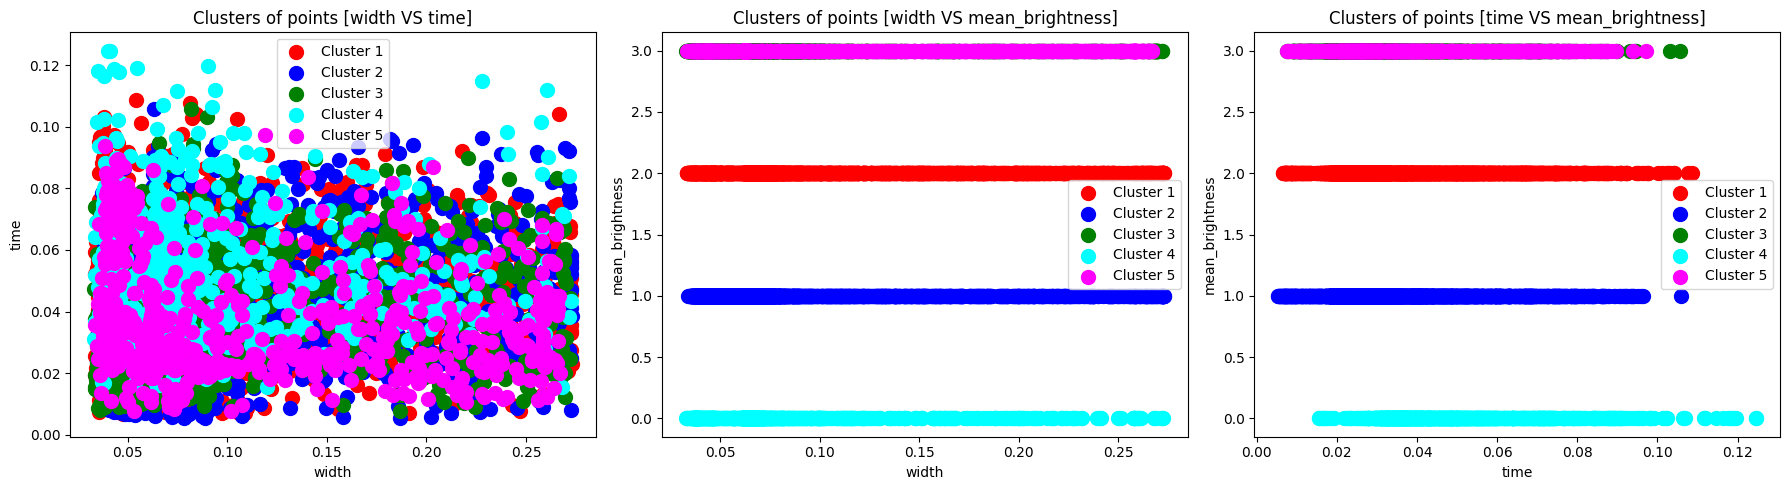

In [350]:
attrs = ['width', 'time', 'mean_brightness']
indices = [6, 10, 11]

fig, axes = plt.subplots(1,3, figsize=(18,5))

# For each combination (without repetitions) = For each pair of variables
plot = 0
for i in range(3):
    for j in range(i+1,3):
        plot_scatter(indices[i],indices[j],attrs[i], attrs[j], axes[plot])
        plot += 1

plt.tight_layout()
plt.show()